In [16]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from six import StringIO
from sklearn import tree
import numpy as np

In [4]:
#!python -m pip install graphviz

get_ipython().system('python -m pip install pydotplus')
#!python -m pip install graphviz

In [48]:
feature_cols = ["PJM_Demand","PJM_Wind","NYIS_Demand","NYIS_Wind","load_ratio","NYISloop_da","PJM_Daily","NYIS_Daily"]
# load dataset
pima = pd.read_csv("Dataset1_2023-03-14_TrainingSet.csv")

In [49]:
features_considered=["PJM_Demand","PJM_Wind","NYIS_Demand","NYIS_Wind","load_ratio","NYISloop_da","PJM_Daily","NYIS_Daily","Target","Class"]

In [50]:
df=pima[features_considered]

In [51]:
df=df.dropna()

In [52]:
df.corr()

,PJM_Demand,PJM_Wind,NYIS_Demand,NYIS_Wind,load_ratio,NYISloop_da,PJM_Daily,NYIS_Daily,Target,Class
PJM_Demand,1.000000,-0.208550,0.938876,-0.118744,0.182026,-0.170243,0.737862,0.690754,0.180284,-0.152865
PJM_Wind,-0.208550,1.000000,-0.255548,0.446155,0.139088,-0.049833,-0.236713,-0.288131,0.026061,0.014105
NYIS_Demand,0.938876,-0.255548,1.000000,-0.126474,-0.163339,-0.157802,0.720368,0.769504,0.168239,-0.186325
NYIS_Wind,-0.118744,0.446155,-0.126474,1.000000,0.030165,0.005224,-0.113850,-0.125629,-0.057900,0.080950
load_ratio,0.182026,0.139088,-0.163339,0.030165,1.000000,-0.040568,0.074563,-0.190680,0.025226,0.099450
NYISloop_da,-0.170243,-0.049833,-0.157802,0.005224,-0.040568,1.000000,-0.238678,-0.199132,-0.422804,0.371916
PJM_Daily,0.737862,-0.236713,0.720368,-0.113850,0.074563,-0.238678,1.000000,0.936154,0.305152,-0.295027
NYIS_Daily,0.690754,-0.288131,0.769504,-0.125629,-0.190680,-0.199132,0.936154,1.000000,0.250935,-0.292575
Target,0.180284,0.026061,0.168239,-0.057900,0.025226,-0.422804,0.305152,0.250935,1.000000,-0.699274
Class,-0.152865,0.014105,-0.186325,0.080950,0.099450,0.371916,-0.295027,-0.292575,-0.699274,1.000000


In [53]:
X = df[feature_cols] # Features
y = df[['Class']]

In [144]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=114) # 70% training and 30% test

In [145]:
y_train.value_counts()

Class
2        5978
1        5534
3        1639
dtype: int64

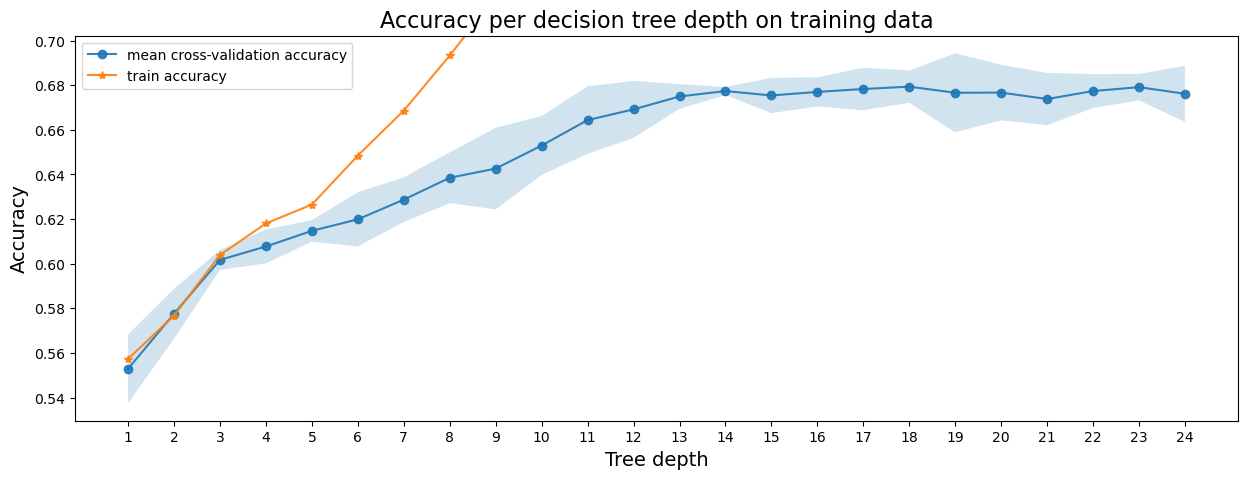

In [146]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=3, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [165]:
clf = DecisionTreeClassifier(max_depth=4,class_weight='balanced')
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [166]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [167]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5407542579075426


In [168]:
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

0.5453147979485102

In [169]:
classification_report_actual = classification_report(y_test, y_pred)

In [170]:
# Actual obtained results without any manual setting of Decision Threshold.
predict_actual = clf.predict(X_test)       # Predict using classifier.
accuracy_actual = clf.score(X_test, y_test)
classification_report_actual = classification_report(y_test, predict_actual)
print(predict_actual, accuracy_actual, classification_report_actual, sep ='\n')

[2 1 1 ... 3 2 2]
0.5407542579075426
              precision    recall  f1-score   support

           1       0.62      0.65      0.64      1332
           2       0.67      0.40      0.50      1537
           3       0.31      0.72      0.43       419

    accuracy                           0.54      3288
   macro avg       0.53      0.59      0.52      3288
weighted avg       0.60      0.54      0.55      3288



In [171]:
y_predict=pd.DataFrame(y_pred)

y_predict.value_counts()

1    1389
3     982
2     917
dtype: int64

In [172]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)

In [173]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2,3])


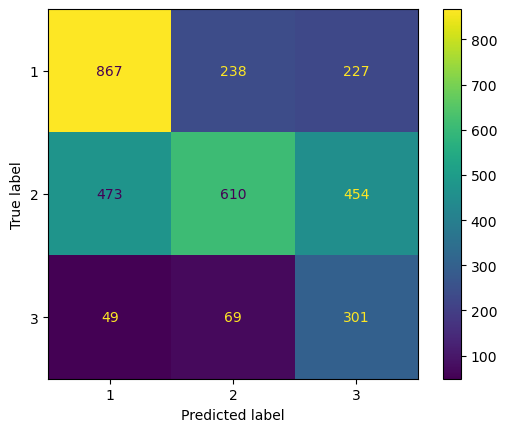

In [174]:
cm_display.plot()
plt.show()

In [175]:
#conda install -c conda-forge pydotplus

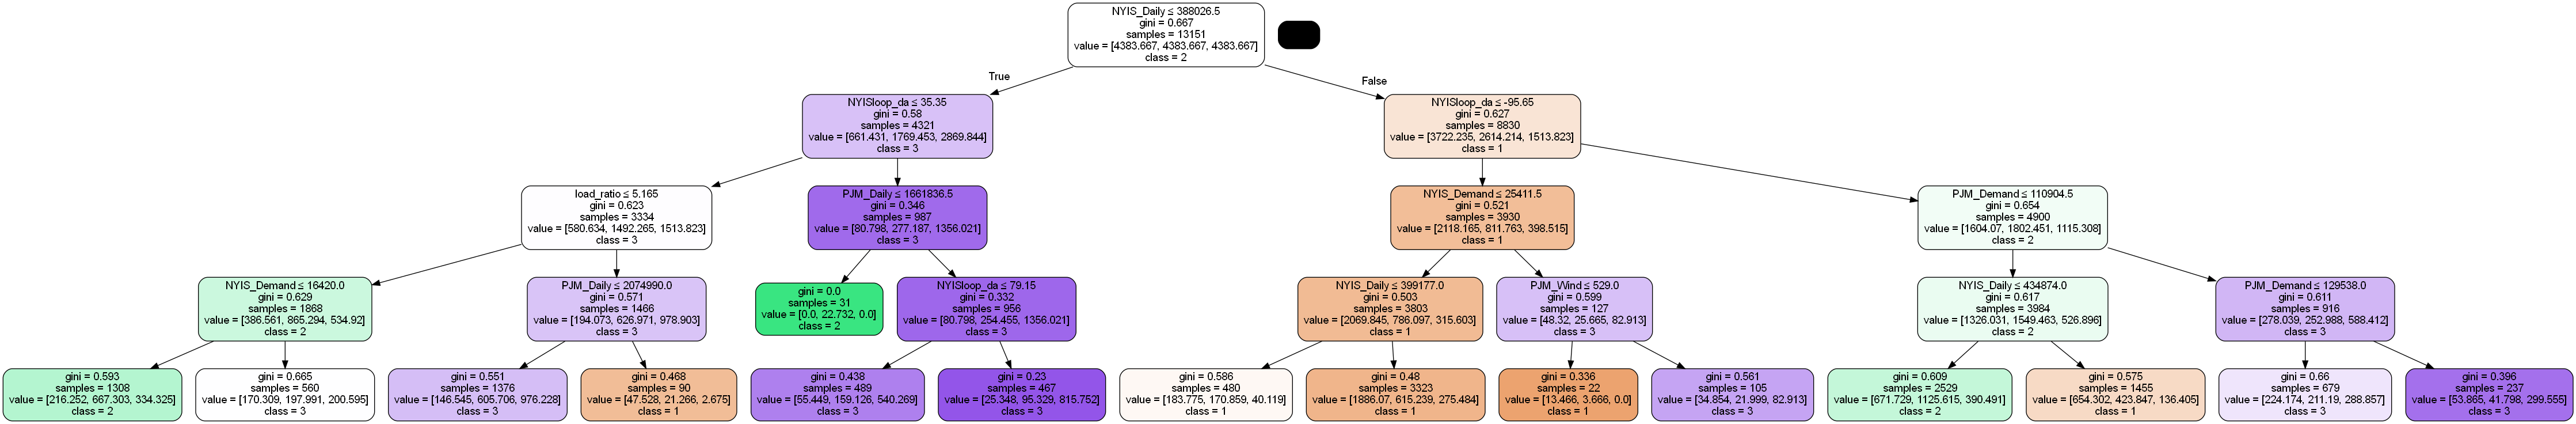

In [176]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ONT.png')
Image(graph.create_png())